Philippe Joly
MAIS 202

This is an implementation of Support Vector Regression (SVR) on Electrical Power Output based on the Weather in Quebec

# Imports

In [1]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import pickle
import os
from dotenv import load_dotenv
load_dotenv()

True

# Data

In [3]:
data = pd.read_csv(os.getenv("DATA"))
# data['Date/Time (UTC)'] = pd.to_datetime(data['Date/Time (UTC)'])
data.dropna(inplace=True)
# data.drop(columns=['Date/Time (UTC)','Year'], inplace=True)
data=data[data["Month"]==8]
data = data[data["Year"]==2020]

# X_tot = data.drop(columns=["Average Power Output (MW)"]).values
# y_tot = data["Average Power Output (MW)"].values

# X, X_test, y, y_test = train_test_split(X_tot, y_tot, test_size=0.1, random_state=45)

# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=45)

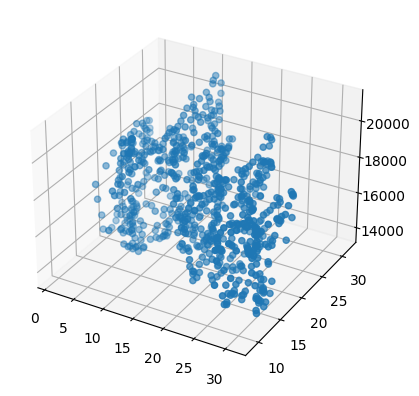

In [6]:
ax = plt.axes(projection="3d")
ax.scatter3D(data['Day'], data['Temp (°C)'], data['Average Power Output (MW)'])
# plt.scatter(data["Day"], data['Average Power Output (MW)'])

In [ ]:
y = y.reshape(len(y), 1)
y_val = y_val.reshape(len(y_val), 1)
y_test = y_test.reshape(len(y_test), 1)

x_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

X = x_scaler.transform(X)
y = y_scaler.transform(y)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

y = y.reshape(y.shape[0])
y_val = y_val.reshape(y_val.shape[0])
y_test = y_test.reshape(y_test.shape[0])

# Hyper-Parameter Tuning

In [ ]:
svr = SVR()

In [ ]:
opt_params=[{
    'C': np.logspace(-4,4,10),
    'gamma': np.logspace(-6,1,10),
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}]

In [ ]:
clf = BayesSearchCV(svr, search_spaces=opt_params, cv=3, verbose=False, n_jobs=-1, n_iter=200, max_iter=2000)
best_clf = clf.fit(X,y)

In [ ]:
results = pd.DataFrame(best_clf.cv_results_).sort_values(by="rank_test_score", ascending=True)

In [ ]:
results.head(25)

In [ ]:
best_clf.best_score_

In [ ]:
model_ls = []
err = []
for i in range(10):
    err.append([])
    model = SVR(**results['params'].iloc[i])
    model.fit(X, y)
    y_pred = model.predict(X_val)
    err[i].append(mean_squared_error(y_val, y_pred))
    err[i].append(r2_score(y_val, y_pred))
    err[i].append(mean_absolute_error(y_val, y_pred))
    model_ls.append(model)

In [ ]:
err

In [ ]:
# f = "svr_bayes_rbf"
# pickle.dump(model_ls[0], open(f, "wb"))

In [ ]:
# svr_rbf = SVR()

In [ ]:
# opt_params=[{
#     'C': np.logspace(-4,4,10),
#     'gamma': np.logspace(-6,1,10),
#     'epsilon': [0.01, 0.1, 0.2, 0.5],
#     'tol': [1e-3, 1e-4, 1e-5],
#     'kernel': ['rbf'],
#     'max_iter': [100,1000]
# }]

In [ ]:
# clf_rbf = BayesSearchCV(svr_rbf, search_spaces=opt_params, cv=3, verbose=False, n_jobs=-1, n_iter=200)
# best_clf_rbf = clf_rbf.fit(X,y)

In [ ]:
# results_rbf = pd.DataFrame(best_clf_rbf.cv_results_).sort_values(by="rank_test_score", ascending=True, ignore_index=True)

In [ ]:

# for i in range(100):
#     print(results_rbf['params'].iloc[i])
# results_rbf.tail(25)

In [ ]:
# best_clf_rbf.best_score_

# Model and Training

# Testing